# Ciência dos Dados - 2019.2 2B

## Projeto 1 - Giovanna Campedelli 

## Cooperação Econômica Ásia-Pacífico

"A APEC trabalha para elevar os padrões de vida e os níveis de ensino de seus membros através de um crescimento econômico sustentável e para fomentar um sentimento de comunidade e uma valorização de interesses compartilhados entre os países da região Ásia-Pacífico." https://pt.wikipedia.org/wiki/Cooperação_Econômica_Ásia-Pacífico


### Perguntas
1. Existe aumento da evolução do IDH e investimento estrangeiro de países que passam a fazer parte da APEC? 
2. O Peru, que entrou para a APEC em 1998 melhorou, sua posição de IDH e de comercio de mercadorias (exportação e importação) em relação a países comparáveis que não faziam parte da organização (ex Colombia)?
    
### Hipoteses    
1. Países que se juntam a APEC têm aumento de exportações porque há aumento dos mercados consumidores, aumentando o desenvolvimento econômico.
2. Países que se juntam a APEC têm elevação dos padrões de vida e os níveis de ensino através de um crescimento econômico.

### Justificativa
Como o Peru entrou para a APEC é esperado que este tenha tanto uma ascensão economica, atraves de trocas de mercadorias, quanto uma melhoria nos padrões de vida, como o bloco propoe.


### --
Desta forma, este relatorio propoe fazer uma analise entre os paises pertencentes à APEC e o mundo como um todo; dando destaque ao Peru e a Colombia, os quais são paises latino americano com litoral para o pacifico e processo historico parecido. Para isso, será preciso dar ensafase nos indicadores: PIB, IDH, trocas mercantis (exportação, importação - % of GDP) e investimento estrangeiro (% of GDP)



### Bases de dados usadas

Dados retirados do https://www.gapminder.org/data/

## Análise Exploratória

Inicialmente é necessário ler e então filtrar os dados obtidos a partir da plataforma "Gapminder" para então construir um Data Frame ábil para análise.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\giohc\OneDrive\Documentos\Ciencias dos Dados\Projeto-1-


In [3]:
#leituras dos arquivos em Excel
GDP = pd.read_excel('gdp_total_yearly_growth.xlsx')
HDI = pd.read_excel('hdi_human_development_index.xlsx')
MT = pd.read_excel('merchandise_trade_percent_of_gdp.xlsx')
invest = pd.read_excel('foreign_direct_investment_net_inflows_percent_of_gdp.xlsx')

In [4]:
#Selecionando os paises membros membros da APEC
membros = ['Peru','Chile', 'Australia', 'Brunei', 'Canada', 'United States', 'Indonesia', 'Japan', 'South Korea', 'Malaysia', 'New Zealand', 'Philippines', 'Singapore', 'China', 'Thailand', 'Mexico', 'Russia', 'Papua New Guinea', 'Vietnam']

In [5]:
#Troca de índices --> colocar os paises como indice
gdp = GDP.set_index('country')
hdi = HDI.set_index('country')
mt = MT.set_index('country')
IN = invest.set_index('country')

#### Dados GDP:

In [6]:
gdpALL = gdp.transpose() 
all_GDP = gdpALL.loc[gdpALL.index>1979]  #Escolhendo os dados a partir de 1997
MEAN_all_GDP = all_GDP.transpose().mean() #Média anual mundial do PIB

In [7]:
gdp_APEC = gdp.loc[membros,:]
gdpAPEC = gdp_APEC.transpose()
APEC_GDP = gdpAPEC.loc[gdpAPEC.index>1979].transpose().mean() #Média anual do bloco APEC do PIB

In [8]:
gdp_Peru = gdp.loc[['Peru'],:]
gdpPERU = gdp_Peru.transpose()
MEAN_PERU_GDP = gdpPERU.loc[gdpPERU.index>1979].transpose().mean() #Dados anuais do PIB do PERU

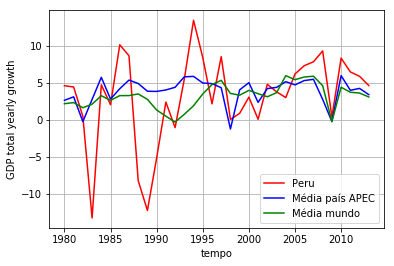

In [9]:
tempo = np.arange(1980,2014,1)
plt.plot(tempo,MEAN_PERU_GDP,'red', label="Peru")
plt.plot(tempo, APEC_GDP, 'blue', label="Média país APEC")
plt.plot(tempo, MEAN_all_GDP, 'green', label="Média mundo")
plt.xlabel("tempo")
plt.ylabel("GDP total yearly growth")
plt.legend()
plt.grid(True)
plt.show()

Podemos ver há uma disparidade entre os dados, porém depois de 1998, para o Peru, não houve mais quedas bruscas em seu PIB anual, podendo associar, como uma hipotese, à sua entrada no bloco APEC.

#### Dados IDH

In [10]:
hdiALL = hdi.transpose()
all_HDI = hdiALL.loc[(hdiALL.index>1989) & (hdiALL.index<2014)] #Escolhendo os dados a partir de 1997 até 2014
MEAN_all_HDI = all_HDI.transpose().mean() #Média anual mundial do idh


In [11]:
hdi_APEC = hdi.loc[membros,:]
HDI_apec= hdi_APEC.transpose()
APEC_HDI = HDI_apec.loc[(HDI_apec.index>1989) & (HDI_apec.index<2014)].transpose().mean() #Média anual do bloco APEC do IDH

In [12]:
hdi_Peru = hdi.loc[['Peru'],:]
hdiPERU = hdi_Peru.transpose()
MEAN_PERU_HDI = hdiPERU.loc[(hdiPERU.index>1989)&(hdiPERU.index<2014)].transpose().mean() #Dados anuais do IDH do PERU

In [13]:
hdi_Colombia = hdi.loc[['Colombia'],:]
hdiCOLO = hdi_Colombia.transpose()
MEAN_COLO_HDI = hdiCOLO.loc[(hdiCOLO.index>1989)&(hdiCOLO.index<2014)].transpose().mean() #Dados anuais do IDH do Colombia para comparação com Peru (pais historicamente e com indices parecidos)

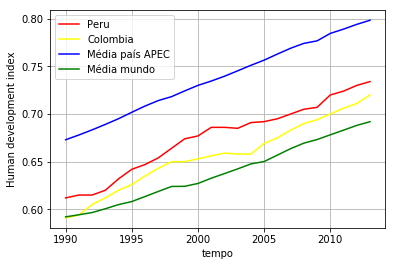

In [14]:
tempo = np.arange(1990,2014,1)
plt.plot(tempo,MEAN_PERU_HDI,'red', label="Peru")
plt.plot(tempo,MEAN_COLO_HDI,'yellow', label="Colombia")
plt.plot(tempo, APEC_HDI, 'blue', label="Média país APEC")
plt.plot(tempo, MEAN_all_HDI, 'green', label="Média mundo")
plt.xlabel("tempo")
plt.ylabel("Human development index")
plt.legend()
plt.grid(True)
plt.show()

É possível ver que os dados de IDH do Peru se encontram, ao longo do tempo, entre a média do bloco e do mundo. É importante ressaltar também que a Colombia sempre teve um IDH um pouco a baixo do Peru, isso será importante para futuras análises. 

#### Dados Merchandise trade (% of GDP)

In [15]:
mtALL = hdi.transpose()
all_MT = mtALL.loc[(mtALL.index>1989)&(mtALL.index<2014)] #Escolhendo os dados a partir de 1997 até 2014
MEAN_all_MT = all_MT.transpose().mean() #Média anual mundial de trocas de mercadoria

In [16]:
mt_APEC = mt.loc[membros,:]
dadoMT_APEC= mt_APEC.transpose()
APEC_MT = dadoMT_APEC.loc[(dadoMT_APEC.index>1989)&(dadoMT_APEC.index<2014)].transpose().mean() #Média anual do bloco APEC de trocas de mercadoria

In [17]:
mt_Peru = mt.loc[['Peru'],:]
mtPERU = mt_Peru.transpose()
MEAN_PERU_MT = mtPERU.loc[(mtPERU.index>1989)&(mtPERU.index<2014)].transpose().mean() #Dados anuais de trocas de mercadoria do PERU

In [18]:
mt_Colombia = mt.loc[['Colombia'],:]
mtCOLO = mt_Colombia.transpose()
MEAN_COLO_MT = mtCOLO.loc[(mtCOLO.index>1989)&(mtCOLO.index<2014)].transpose().mean() #Dados anuais de trocas de mercadoria do Colombia

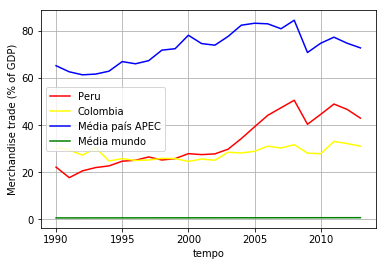

In [19]:
tempo = np.arange(1990,2014,1)
plt.plot(tempo,MEAN_PERU_MT,'red', label="Peru")
plt.plot(tempo,MEAN_COLO_MT,'yellow', label="Colombia")
plt.plot(tempo, APEC_MT, 'blue', label="Média país APEC")
plt.plot(tempo, MEAN_all_MT, 'green', label="Média mundo")
plt.xlabel("tempo")
plt.ylabel("Merchandise trade (% of GDP)")
plt.legend()
plt.grid(True)
plt.show()

Desconsiderando os dados mundiais, nesse caso, é possível ver que a curva do Peru acompanha a curva dos paises membros da APEC; assim, podemos supor uma associação. É importante ressaltar, contuto, que a curva do Peru se encontra em uma faixa de "altura" parecida com a da Colombia.

#### Dados de entrada liquida de investimento estrangeiro (% of GDP)

In [20]:
inALL = IN.transpose()
all_IN = inALL.loc[(inALL.index>1979)&(inALL.index<2014)] #Escolhendo os dados a partir de 1997 até 2014
MEAN_all_IN = all_IN.transpose().mean() #Média anual mundial de trocas de mercadoria

In [21]:
data_inAPEC = IN.loc[membros,:]
dadoIN_APEC= data_inAPEC.transpose()
APEC_in = dadoIN_APEC.loc[(dadoIN_APEC.index>1979)&(dadoIN_APEC.index<2014)].transpose().mean() #Média anual do bloco APEC

In [22]:
IN_Peru = IN.loc[['Peru'],:]
inPERU = IN_Peru.transpose()
MEAN_PERU_IN = inPERU.loc[(inPERU.index>1979)&(inPERU.index<2014)].transpose().mean() #Dados anuais Peru

In [23]:
IN_Colombia = IN.loc[['Colombia'],:]
inCOLO = IN_Colombia.transpose()
MEAN_COLO_IN = inCOLO.loc[(inCOLO.index>1979)&(inCOLO.index<2014)].transpose().mean() #Dados anuais Colombia

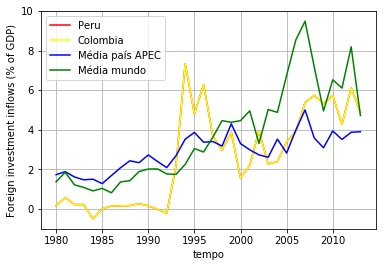

In [24]:
tempo = np.arange(1980,2014,1)
plt.plot(tempo,MEAN_PERU_IN,'red', label="Peru")
plt.plot(tempo,MEAN_PERU_IN,'yellow', label="Colombia")
plt.plot(tempo, APEC_in, 'blue', label="Média país APEC")
plt.plot(tempo, MEAN_all_IN, 'green', label="Média mundo")
plt.xlabel("tempo")
plt.ylabel("Foreign investment inflows (% of GDP)")
plt.legend()
plt.grid(True)
plt.show()

Como pode ser observado no gráfico, Peru e Colombia tem os mesmos (sobreposição no gráfico) indices de investimento externo, mesmo depois de 1998.

### Analise de um dado ano

#### 1997 (antes de o Peru entrar no bloco) X 2012 (15 anos depois)

###### PIB X Entrada liquida de investimento estrangeiro:

In [25]:
#Selecionando os anos a serem abordados de GDP
gdp_1997 = gdp.loc[:, 1997].to_frame()
gdp_2012 = gdp.loc[:, 2012].to_frame()

In [26]:
#Selecionando os anos a serem abordados da entrada de investimento externo
IN_1997 = IN.loc[:,1997].to_frame()
IN_2012 = IN.loc[:,2012].to_frame()

In [27]:
#juntando as tabelas do PIB e entrada de investimento externo
data = gdp_1997.join(IN_1997, how="inner", lsuffix='_GDP', rsuffix='_foreign_investment_inflows')
data2012 = gdp_2012.join(IN_2012, how="inner", lsuffix='_GDP', rsuffix='_foreign_investment_inflows')

In [28]:
#Codigo para achar achar as retas de tendencia (enfatizando o coeficiente angular) do GDP X foreign_investment_inflows
def reta(dados_x, dados_y, c):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Coeficiente angular:', a)
    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)
    plt.title('GDP versus foreign_investment_inflows em 1997')
    plt.xlabel('GDP')
    plt.ylabel('foreign investment inflows')

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)
    plt.tight_layout()

Coeficiente angular: 0.5538861667711344
Coeficiente angular: 0.2669236845332827
Coeficiente angular: -0.4775501386375454
Coeficiente angular: -0.09801653822076103


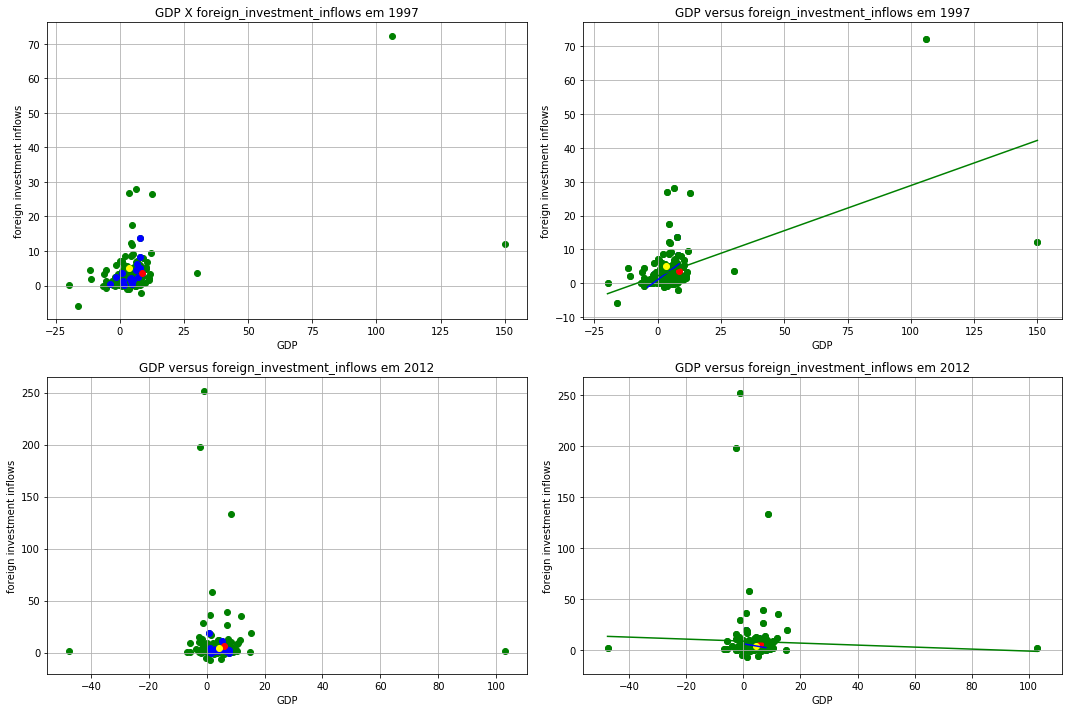

In [29]:
#pltando graficos
fig = plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.scatter(data.loc[:, '1997_GDP'], data.loc[:, '1997_foreign_investment_inflows'], color="green")
plt.scatter(data.loc[membros, '1997_GDP'], data.loc[membros, '1997_foreign_investment_inflows'], color="b")
plt.scatter(data.loc['Peru', '1997_GDP'], data.loc['Peru', '1997_foreign_investment_inflows'], color="r")
plt.scatter(data.loc['Colombia', '1997_GDP'], data.loc['Colombia', '1997_foreign_investment_inflows'], color="yellow")
plt.title('GDP X foreign_investment_inflows em 1997')
plt.xlabel('GDP')
plt.ylabel('foreign investment inflows')
plt.grid(True)


plt.subplot(2,2,2)
plt.scatter(data.loc[membros, '1997_GDP'], data.loc[membros, '1997_foreign_investment_inflows'], color="b")
reta(data.loc[membros, '1997_GDP'], data.loc[membros, '1997_foreign_investment_inflows'], "b")
plt.scatter(data.loc[:, '1997_GDP'], data.loc[:, '1997_foreign_investment_inflows'], color="green")
reta(data.loc[:, '1997_GDP'], data.loc[:, '1997_foreign_investment_inflows'], "g")
plt.scatter(data.loc['Peru', '1997_GDP'], data.loc['Peru', '1997_foreign_investment_inflows'], color="r")
plt.scatter(data.loc['Colombia', '1997_GDP'], data.loc['Colombia', '1997_foreign_investment_inflows'], color="yellow")
plt.grid(True)

plt.subplot(2,2,3)
plt.scatter(data2012.loc[:, '2012_GDP'], data2012.loc[:, '2012_foreign_investment_inflows'], color="green")
plt.scatter(data2012.loc[membros, '2012_GDP'], data2012.loc[membros, '2012_foreign_investment_inflows'], color="b")
plt.scatter(data2012.loc['Peru', '2012_GDP'], data2012.loc['Peru', '2012_foreign_investment_inflows'], color="r")
plt.scatter(data2012.loc['Colombia', '2012_GDP'], data2012.loc['Colombia', '2012_foreign_investment_inflows'], color="yellow")
plt.title('GDP versus foreign_investment_inflows em 2012')
plt.xlabel('GDP')
plt.ylabel('foreign investment inflows')
plt.grid(True)

plt.subplot(2,2,4)
plt.scatter(data2012.loc[membros, '2012_GDP'], data2012.loc[membros, '2012_foreign_investment_inflows'], color="b")
reta(data2012.loc[membros, '2012_GDP'], data2012.loc[membros, '2012_foreign_investment_inflows'], "b")
plt.scatter(data2012.loc[:, '2012_GDP'], data2012.loc[:, '2012_foreign_investment_inflows'], color="green")
reta(data2012.loc[:, '2012_GDP'], data2012.loc[:, '2012_foreign_investment_inflows'], "g")
plt.scatter(data2012.loc['Peru', '2012_GDP'], data2012.loc['Peru', '2012_foreign_investment_inflows'], color="r")
plt.scatter(data2012.loc['Colombia', '2012_GDP'], data2012.loc['Colombia', '2012_foreign_investment_inflows'], color="yellow")
plt.title('GDP versus foreign_investment_inflows em 2012')
plt.xlabel('GDP')
plt.ylabel('foreign investment inflows')
plt.grid(True)

plt.show()

-> Em 1997, para os paises membros da APEC, uma variação de um ponto percentual na taxa do PIB esta associada a um crescimento de 0.55 (% PIB/ PIB) na taxa de "Entrada liquida de investimento estrangeiro".

   Já para o mundo como um todo em 1997, a variação de um ponto percentual na taxa do PIB esta associada a um crescimento de 0.26 (% PIB/ PIB) na taxa de "Entrada liquida de investimento estrangeiro".

-> Para paises membros da APEC, em 2012, houve uma variação de um ponto percentual na taxa do PIB esta associada a um crescimento de -0.47 (% PIB/ PIB) na taxa de "Entrada liquida de investimento estrangeiro".

   Já para o mundo como um todo em 2012, a variação de um ponto percentual na taxa do PIB esta associada a um crescimento de -0.09 (% PIB/ PIB) na taxa de "Entrada liquida de investimento estrangeiro".

###### HDI X Trocas comerciais/mercadorias (% of GDP)

In [30]:
#Selecionando os anos a serem abordados de HDI
hdi_1997 = hdi.loc[:, 1997].to_frame()
hdi_2012 = hdi.loc[:, 2012].to_frame()

In [31]:
#Selecionando os anos a serem abordados das trocas comerciais
mt_1997 = mt.loc[:,1997].to_frame()
mt_2012 = mt.loc[:,2012].to_frame()

In [32]:
#juntando as tabelas do IDH e Trocas comerciais
data = hdi_1997.join(mt_1997, how="inner", lsuffix='_HDI', rsuffix='_MT')
data12 = hdi_2012.join(mt_2012, how="inner", lsuffix='_HDI', rsuffix='_MT')

In [33]:
#Codigo para achar achar as retas de tendencia (enfatizando o coeficiente angular) do 'human_development_index X Merchandise_trade(% of GDP)
def reta2(dados_x, dados_y, c):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Coeficiente angular:', a)
    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)
    plt.title('human_development_index versus Merchandise_trade(% of GDP)  em 1997')
    plt.xlabel('HDI')
    plt.ylabel('Merchandise trade')

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)
    plt.tight_layout()

Coeficiente angular: 45.18785928910158
Coeficiente angular: -22.78439283747454
Coeficiente angular: 57.631439279958215
Coeficiente angular: 32.62835537033009


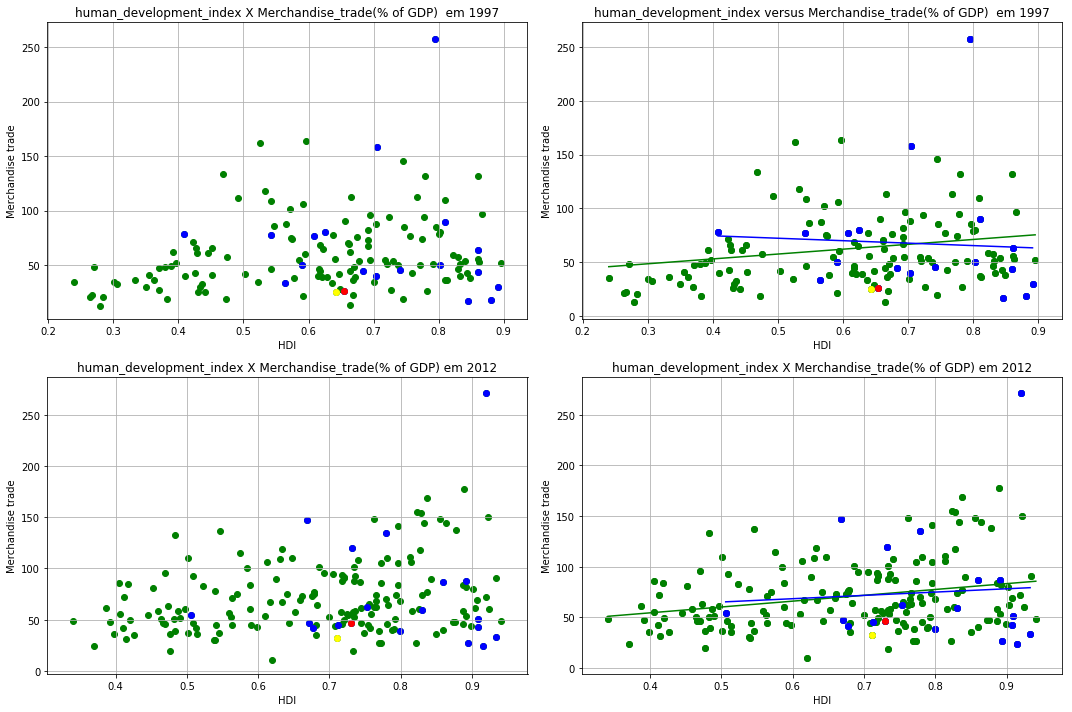

In [34]:
#pltando graficos
fig = plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.scatter(data.loc[:, '1997_HDI'], data.loc[:, '1997_MT'], color="green")
plt.scatter(data.loc[membros, '1997_HDI'], data.loc[membros, '1997_MT'], color="b")
plt.scatter(data.loc['Peru', '1997_HDI'], data.loc['Peru', '1997_MT'], color="r")
plt.scatter(data.loc['Colombia', '1997_HDI'], data.loc['Colombia', '1997_MT'], color="yellow")
plt.title('human_development_index X Merchandise_trade(% of GDP)  em 1997')
plt.xlabel('HDI')
plt.ylabel('Merchandise trade')
plt.grid(True)

plt.subplot(2,2,2)
plt.scatter(data.loc[:, '1997_HDI'], data.loc[:, '1997_MT'], color="green")
reta2(data.loc[:, '1997_HDI'], data.loc[:, '1997_MT'], "g")
plt.scatter(data.loc[membros, '1997_HDI'], data.loc[membros, '1997_MT'], color="b")
reta2(data.loc[membros, '1997_HDI'], data.loc[membros, '1997_MT'], "b")
plt.scatter(data.loc['Peru', '1997_HDI'], data.loc['Peru', '1997_MT'], color="r")
plt.scatter(data.loc['Colombia', '1997_HDI'], data.loc['Colombia', '1997_MT'], color="yellow")
plt.grid(True)

plt.subplot(2,2,3)
plt.scatter(data12.loc[:, '2012_HDI'], data12.loc[:, '2012_MT'], color="green")
plt.scatter(data12.loc[membros, '2012_HDI'], data12.loc[membros, '2012_MT'], color="b")
plt.scatter(data12.loc['Peru', '2012_HDI'], data12.loc['Peru', '2012_MT'], color="r")
plt.scatter(data12.loc['Colombia', '2012_HDI'], data12.loc['Colombia', '2012_MT'], color="yellow")
plt.title('human_development_index X Merchandise_trade(% of GDP) em 2012')
plt.xlabel('HDI')
plt.ylabel('Merchandise trade')
plt.grid(True)

plt.subplot(2,2,4)
plt.scatter(data12.loc[:, '2012_HDI'], data12.loc[:, '2012_MT'], color="green")
reta2(data12.loc[:, '2012_HDI'], data12.loc[:, '2012_MT'], "g")
plt.scatter(data12.loc[membros, '2012_HDI'], data12.loc[membros, '2012_MT'], color="b")
reta2(data12.loc[membros, '2012_HDI'], data12.loc[membros, '2012_MT'], "b")
plt.scatter(data12.loc['Peru', '2012_HDI'], data12.loc['Peru', '2012_MT'], color="r")
plt.scatter(data12.loc['Colombia', '2012_HDI'], data12.loc['Colombia', '2012_MT'], color="yellow")
plt.title('human_development_index X Merchandise_trade(% of GDP) em 2012')
plt.xlabel('HDI')
plt.ylabel('Merchandise trade')
plt.grid(True)

plt.show()

-> Em 1997, para os paises membros da APEC, uma variação de um ponto percentual na taxa do IDH esta associada a um crescimento de 45.18 (% PIB/graus de desenvolvimento) na taxa de "Trocas comerciais/ mercadorias".

   Já para o mundo como um todo em 1997, a variação de um ponto percentual na taxa do IDH esta associada a um crescimento de -22.78 (% PIB/graus de desenvolvimento) na taxa de "Trocas comerciais/ mercadorias".

-> Em 2012, contudo, para os membros da APEC, uma variação de um ponto percentual na taxa do IDH esta associada a um crescimento de 57.63 (% PIB/graus de desenvolvimento) na taxa de "Trocas comerciais/ mercadorias".

   Para o mundo como um todo em 2012, a variação de um ponto percentual na taxa do IDH esta associada a um crescimento de 32.62 (% PIB/graus de desenvolvimento) na taxa de "Trocas comerciais/ mercadorias".

## Conclusão

  A Cooperação Econômica Ásia-Pacífico tem como objetivo proporcionar crescimento econômico através do livre comércio entre os membros; tal crescimento promove uma elevação nos padrões de vida dos cidadãos dos membros. Desta forma, foram analisados os índices de PIB, IDH, trocas mercantis (exportação, importação - % of GDP) e investimento estrangeiro (% of GDP). 
    
   Era esperado que países que se juntassem a APEC, tivessem um aumento de exportações, pelo fato de terem uma ampliação dos mercados consumidores, elevação dos padrões de vida e dos níveis de ensino através do crescimento econômico. Pelos gráficos temporais apresentados a cima, é possível ver que os dados médios do PIB mundial acompanham a mesma faixa do PIB médio dos da APEC, assim, é possível fazer uma associação de que há uma grande influência bilateral; além disso, o IDH médio mundial desde 1997, sempre esteve abaixo da média dos membros da APEC, porém, ambos tiveram um crescimento relativo parecido. 
  
Como investimentos externos e as trocas mercantis mundiais não são bons dados para uma análise individual, foi cruzado em gráficos de dispersão, tais variáveis com PIB e IDH, respectivamente. Para ter uma boa noção do que acontece ao longo do tempo, foi definido 2 anos para, posteriormente, compará-los. Estes anos são 1997 (um ano antes do Peru entrar para APEC - análise aprofundada deste país a posteriori) e 2012 (15 anos depois).

##### Para o gráfico de dispersão relacionando PIB e "Entrada líquida de investimento estrangeiro":
  
  Em 1997, para os países membros da APEC, uma variação de um ponto percentual na taxa do PIB está associada a um crescimento de 0.55 (% PIB/ PIB) na taxa de "Entrada líquida de investimento estrangeiro". Já para o mundo como um todo, a variação de um ponto percentual na taxa do PIB está associada a um crescimento de 0.26 (% PIB/ PIB) na taxa de "Entrada líquida de investimento estrangeiro". 
        
   Para os membros da APEC, em 2012 houve uma variação de um ponto percentual na taxa do PIB associada a um crescimento de -0.47 (% PIB/ PIB) na taxa de "Entrada líquida de investimento estrangeiro". Para o mundo como um todo a variação de um ponto percentual na taxa do PIB está associada a um crescimento de -0.09 (% PIB/ PIB) na taxa de "Entrada líquida de investimento estrangeiro".
        
   Assim, enquanto o mundo teve uma variação de -0.35 entre os anos, a APEC teve de uma de -1.02, ou seja, mesmo que no primeiro ano a associação entre PIB e "Entrada líquida de investimento estrangeiro" fosse maior, no segundo houve uma queda tão brusca que não ajudou no desenvolvimento do bloco como um todo. Isso não significa, contudo, que os dados específicos dos países sejam negativos, apenas que em relação ao coeficiente angular da reta de tendência, houve um decaimento na relação expressa no gráfico.

##### Para o gráfico de dispersão relacionando IDH e "Trocas comerciais":
   Em 1997, para os países membros da APEC, uma variação de um ponto percentual na taxa do IDH está associada a um crescimento de 45.18 (% PIB/graus de desenvolvimento) na taxa de "Trocas comerciais/ mercadorias". Já para o mundo como um todo, no mesmo ano, a variação de um ponto percentual na taxa do IDH está associada a um crescimento de -22.78 (% PIB/graus de desenvolvimento) na taxa de "Trocas comerciais/ mercadorias".
   
   Para a APEC em 2012, uma variação de um ponto percentual na taxa do IDH está associada a um crescimento de 57.63 (% PIB/graus de desenvolvimento) na taxa de "Trocas comerciais/ mercadorias". Para o mundo, a variação de um ponto percentual na taxa do IDH está associada a um crescimento de 32.62 (% PIB/graus de desenvolvimento) na taxa de "Trocas comerciais/ mercadorias".
   
   Como podemos ver, os membros da APEC tiveram uma ascensão, entretanto, o mundo como um todo também a teve, e uma muito maior por sinal; assim, é possível supor que o crescimento da APEC nesses aspectos não foi restrito a ações internas, mas sim, um avanço mundial. Ainda é possível relacionar o processo de globalização das últimas duas décadas como essa ascensão geral.
   
   Desta forma, segundo a materia "Economias da Apec reúnem 40% da população mundial e 54% do PIB" do G1 (http://g1.globo.com/Noticias/Mundo/0,,MUL1373247-5602,00-ECONOMIAS+DA+APEC+REUNEM+DA+POPULACAO+MUNDIAL+E+DO+PIB.html) é impensável negar que o bloco tem um grande peso na economia mundial, porém, como grandes potencias participam deste, sua média é elevada, mas como 'os compromissos não são vinculantes, houve pouco progresso'.


##### Análise específica do Peru verus Colômbia
 
   Quando o Peru entrou para a APEC, em 1998, era esperado uma ascensão econômica e uma melhoria em sua posição de IDH, através de comércio de mercadorias (exportação e importação) em relação a Colômbia. É possível fazer uma análise comparativa entre os dois países, que são Latino Americanos com litoral para o Pacífico, processo histórico e índices parecidos.
   
   Através do gráfico temporal do PIB, é possível ver que há uma disparidade entre os pontos de mínimo e máximo dos dados e em relação as médias mundiais e da APEC; porém, depois de 1998, para o Peru não houve mais quedas bruscas em seu PIB anual, podendo associar como uma hipótese a sua entrada no bloco APEC.
   
   Além disso, é possível ver que os dados de IDH do Peru se encontram, ao longo do tempo, entre a média do bloco e do mundo. É importante ressaltar também que a Colômbia sempre teve um IDH levemente abaixo do Peru, ou seja, mesmo depois do Peru ter entrado para o bloco não teve um aumento abrupto, deixando uma distância maior entre a Colômbia. Isso pode ser comprovado também através do gráfico de dispersão de trocas comerciais pelo IDH. É possível ver que o crescimento do IDH ocorreu para ambos, porém, para o Peru houve também um aumento em trocas de mercadorias (não implicando tanto no IDH). Nos dados temporais de trocas de mercadorias é possível ver que a curva do Peru acompanha a curva dos países membros da APEC; assim, podemos supor uma associação. É importante ressaltar que a curva do Peru se encontra em uma faixa de "altura" parecida com a da Colômbia. Além disso, é impreterível observar que no gráfico referente a Entrada de Investimento Externo do Peru e da Colômbia tem os mesmos índices (sobreposição no gráfico) de investimento externo, mesmo depois de 1998.
   
   Com esses dados, é possível fazer uma suposição de que o Peru ter índices maiores do que a Colômbia, não está associado necessariamente com a APEC, pois historicamente isso sempre ocorreu, mesmo antes de entrar para o bloco econômico. Como pode ser visto no artigo do El Pais (https://brasil.elpais.com/brasil/2014/06/13/economia/1402670723_367113.html) há diversos fatores que interferem nas economias destes paises, como por exemplo um outro bloco o qual os dois fazem parte (Aliança do Pacífico, existente na época), a "impulsionada por um ambicioso programa de investimento público em infraestrutura e moradia, e pelo auge de um novo setor de matéria-prima, o do carvão” que a Colômbia passou e "países que reduzem seu crescimento devido à queda da demanda por produtos de mineração" como o Peru.
   
   Desta forma, é possível inferir que o crescimento do Peru não ocorreu unicamente graças a APEC, mas sim a um avanço global e interferencias externas, como as sitadas no artigo, siuações pelas quais Colômbia também passou, "equilibrando" as duas economias.